## Problem Description

The goal of this analysis is to estimate the parameter \(\lambda\) of a Poisson distribution that models failure times. The analysis involves generating random failure times based on a known \(\lambda\) and then estimating this parameter using maximum likelihood estimation (MLE). The process is repeated for different sample sizes to observe how the estimate of \(\lambda\) converges to the true value as the number of samples increases.

Key components of the problem:
1. **Generate Failure Times**: Using a Poisson distribution with a known parameter \(\lambda\), simulate failure times.
2. **Estimate \(\lambda\)**: Calculate the maximum likelihood estimate of \(\lambda\) from the simulated data.
3. **Analyze the Accuracy**: Assess how the estimated \(\lambda\) varies with the number of samples and calculate the relative error compared to the true \(\lambda\).
4. **Visualize the Results**: Create plots to show the distribution of failure times, the log-likelihood function, and how the estimate of \(\lambda\) and its relative error depend on the sample size.


In [2]:
import matplotlib.pyplot as plt
import math
import random
import matplotlib.colors as mcolors
import numpy as np

In [3]:
def analyze_failure_times(num_samples):
    # Function to generate failure times using the Poisson distribution
    def poisson_random_variable(lmbda):
        k = 0
        p = math.exp(-lmbda)
        F = p
        u = random.random()
        while u > F:
            k += 1
            p *= lmbda / k
            F += p
        return k

    # Function to generate failure times
    def generate_failure_times(lmbda, num_samples):
        return [poisson_random_variable(lmbda) for _ in range(num_samples)]

    # Function to calculate log-likelihood
    def log_likelihood(lmbda, data):
        log_likelihood_value = 0
        for x in data:
            log_likelihood_value += x * math.log(lmbda) - lmbda - math.lgamma(x + 1)
        return log_likelihood_value

    # Function to find the lambda value that maximizes the log-likelihood
    def maximize_likelihood(data):
        lmbda_values = [i for i in range(1, 1001)]  # Range of lambda values to test
        log_likelihood_values = [-log_likelihood(lmbda, data) for lmbda in lmbda_values]
        best_lmbda = lmbda_values[log_likelihood_values.index(min(log_likelihood_values))]
        return best_lmbda, lmbda_values, log_likelihood_values

    # Generate failure times
    lambda_true = 500
    failure_times = generate_failure_times(lambda_true, num_samples)

    # Estimate parameter using maximum likelihood
    estimated_lambda, lambda_values, log_likelihood_values = maximize_likelihood(failure_times)

    # Plot failure times and likelihood function
    plt.figure(figsize=(14, 10))

    # Subplot: Distribution of Failure Times
    plt.subplot(2, 2, 1)
    plt.hist(failure_times, bins=range(min(failure_times), max(failure_times) + 2), edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of Failure Times ({num_samples} Samples)')
    plt.xlabel('Failure Times (hours)')
    plt.ylabel('Frequency')

    # Subplot: Likelihood Function
    plt.subplot(2, 2, 2)
    plt.plot(lambda_values, log_likelihood_values, label='Log-Likelihood')
    plt.axvline(x=estimated_lambda, color='r', linestyle='--', label=f'Log-Likelihood Maximum (λ={estimated_lambda:.2f})')
    plt.title('Likelihood Function')
    plt.xlabel('Lambda Value')
    plt.ylabel('Log-Likelihood')
    plt.yscale('log')
    plt.legend()

    # Return estimated lambda and log-likelihood values
    return estimated_lambda, lambda_values, log_likelihood_values


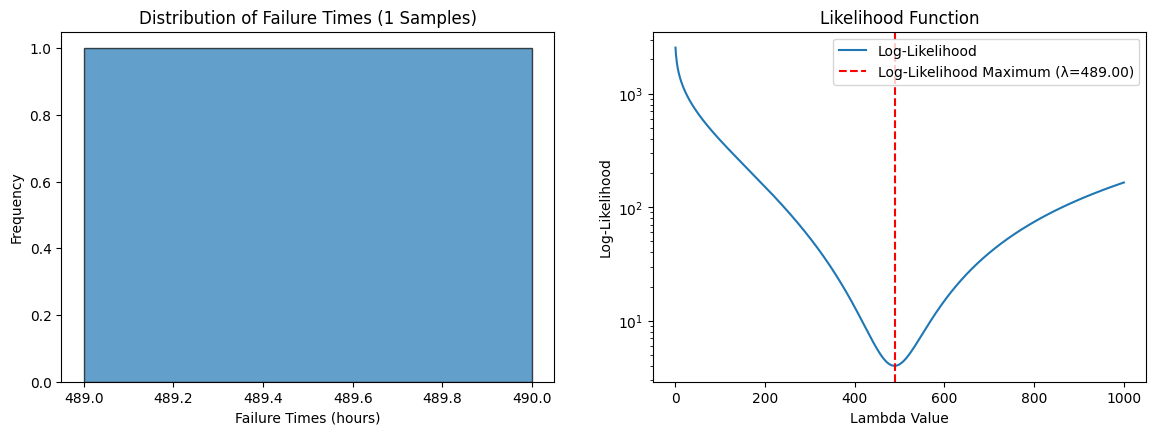

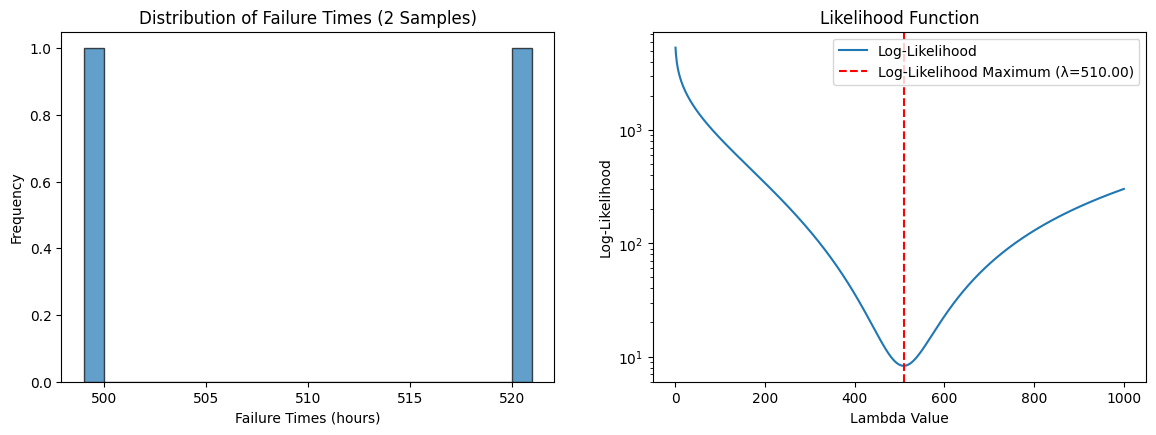

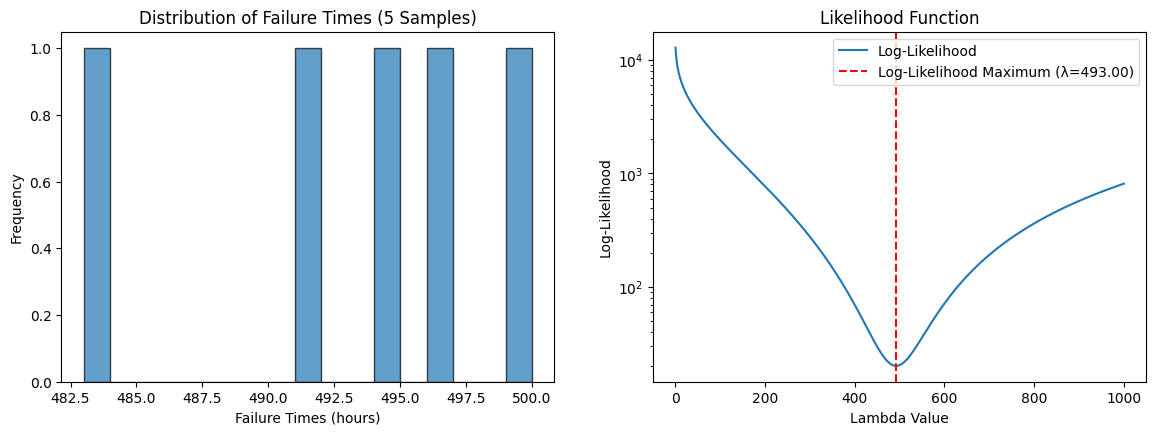

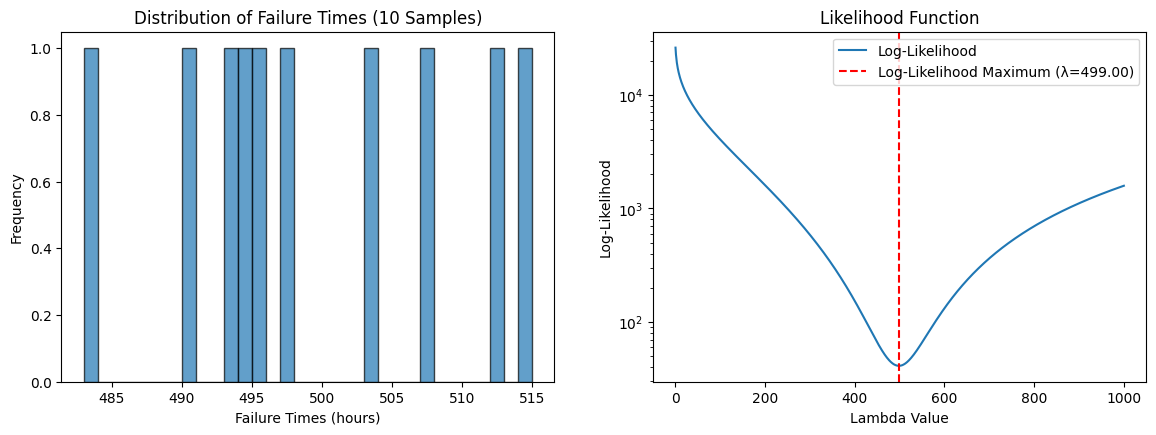

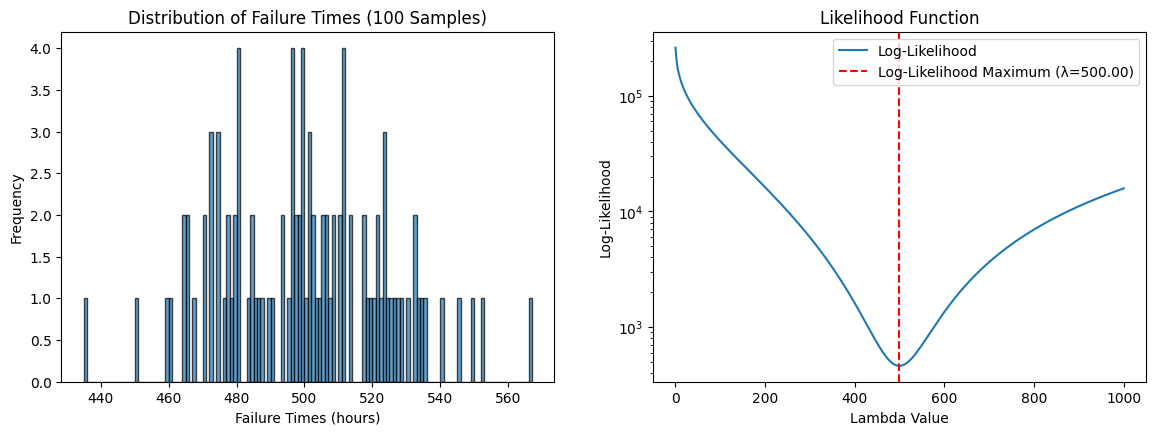

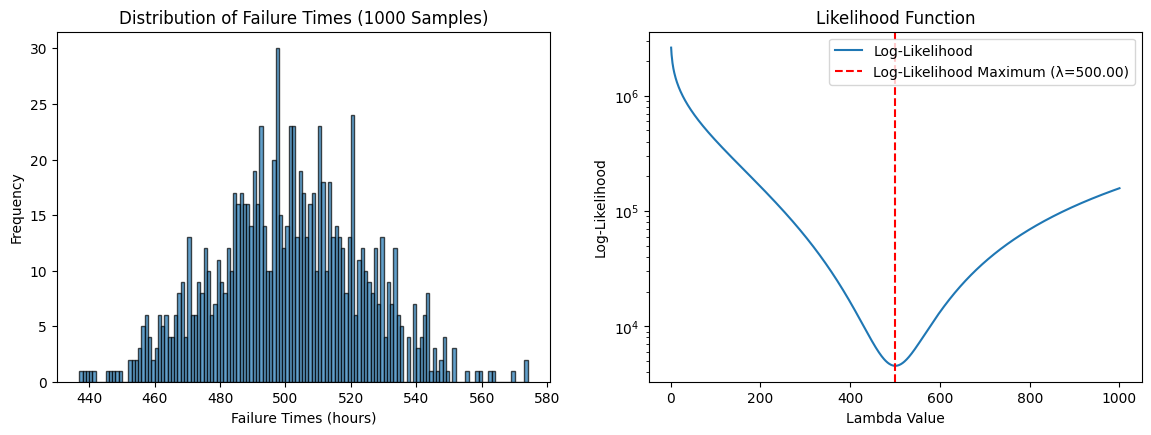

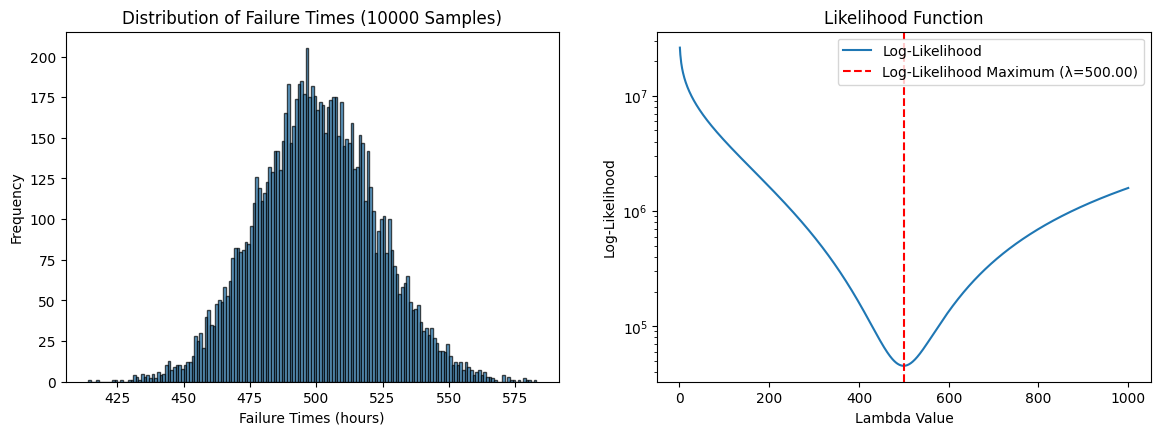

In [4]:
# Sample sizes to test
nsamples = [1, 2, 5, 10, 100, 1000, 10000]
true_lambda = 500
estimated_lambdas = []
relative_errors = []

all_log_likelihoods = []

# Analysis for each sample size
for n in nsamples:
    estimated_lambda, lambda_values, log_likelihood_values = analyze_failure_times(n)
    estimated_lambdas.append(estimated_lambda)
    relative_errors.append(100 * abs(estimated_lambda - true_lambda) / true_lambda)
    all_log_likelihoods.append((lambda_values, log_likelihood_values))

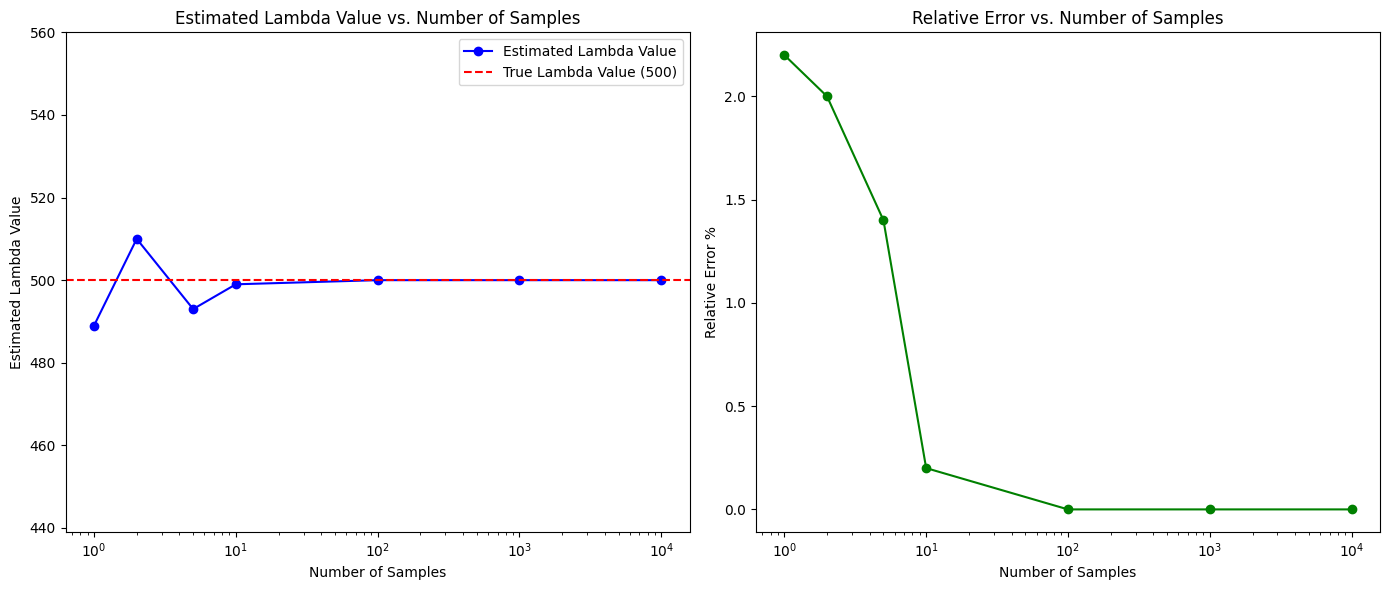

In [5]:
# Plot estimated lambda vs. sample size
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(nsamples, estimated_lambdas, marker='o', linestyle='-', color='b', label='Estimated Lambda Value')
plt.axhline(y=true_lambda, color='r', linestyle='--', label=f'True Lambda Value ({true_lambda})')
plt.xscale('log')
plt.ylim(min(estimated_lambdas) - 50, max(estimated_lambdas) + 50)
plt.xlabel('Number of Samples')
plt.ylabel('Estimated Lambda Value')
plt.title('Estimated Lambda Value vs. Number of Samples')
plt.legend()

# Plot relative error vs. sample size
plt.subplot(1, 2, 2)
plt.plot(nsamples, relative_errors, marker='o', linestyle='-', color='g')
plt.xscale('log')
plt.xlabel('Number of Samples')
plt.ylabel('Relative Error %')
plt.title('Relative Error vs. Number of Samples')

plt.tight_layout()
plt.show()

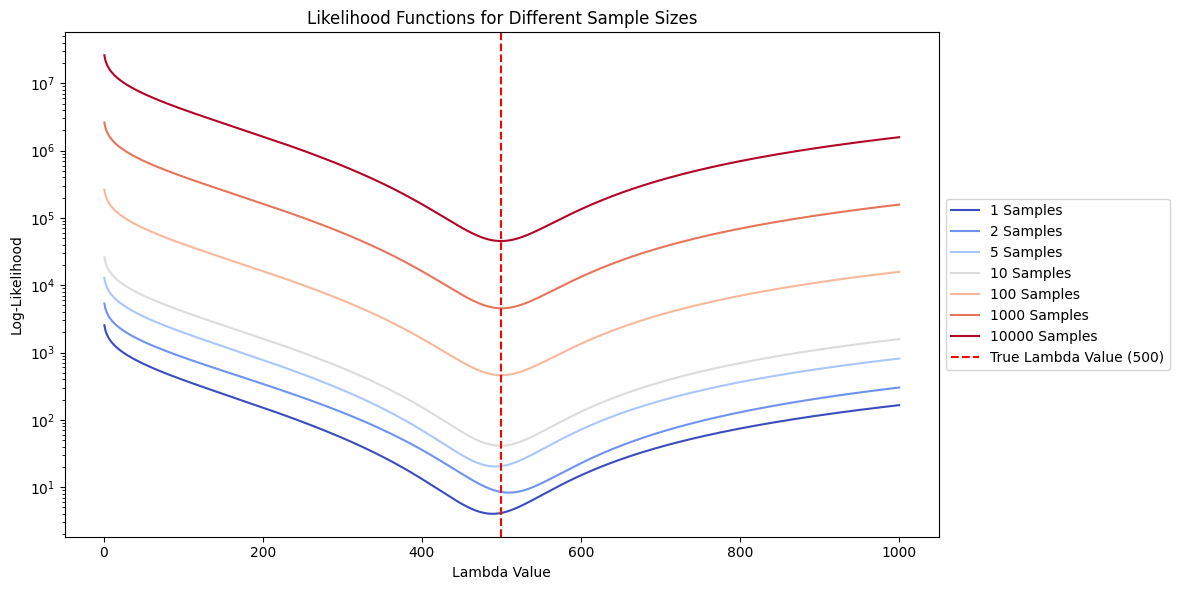

In [6]:
# Colors from the blue-red palette
colors = plt.cm.coolwarm(np.linspace(0, 1, len(nsamples)))

# Overlaid plot of likelihood functions
plt.figure(figsize=(14, 6))

for i, (lambda_values, log_likelihood_values) in enumerate(all_log_likelihoods):
    plt.plot(lambda_values, log_likelihood_values, color=colors[i], label=f'{nsamples[i]} Samples')

plt.axvline(x=true_lambda, color='r', linestyle='--', label=f'True Lambda Value ({true_lambda})')

plt.title('Likelihood Functions for Different Sample Sizes')
plt.xlabel('Lambda Value')
plt.ylabel('Log-Likelihood')
plt.yscale('log')

# Place the legend to the right of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust layout to make space for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()